# Calculate correlation of sPlot CWM and iNaturalist averages

Here we correlate the aggregated trait values close each sPlot (with a certain range) to the community weighted trait mean of each plot (cwm).

This section includes:

- Plot r for each buffer size
- Scatter correlation plots for 64,000 m buffer size

In [ ]:
import pandas as pd
import numpy as np
import os

#plotting
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm, Normalize
import cartopy.crs as ccrs
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

import math

In [ ]:
sPlot = pd.read_csv("sPlotOpen/cwm_loc.csv")

## Plot r for each buffer size

In [35]:
buffer_sizes = [1000,2000,4000,8000,16000,32000,64000,128000,256000]

trait =['Leaf Area',
 'SSD',
 'SLA',
 'Leaf C',
 'Leaf N per mass',
 'Leaf P',
 'Plant Height',
 'Seed mass',
 'Seed length',
 'LDMC',
 'Leaf N per area',
 'Leaf N P ratio',
 'Leaf delta15N',
 'Seeds per rep. unit',
 'Leaf fresh mass',
 'Stem conduit density',
 'Dispersal unit length',
 'Conduit element length'
       ]

r_all = pd.DataFrame(columns=trait)


for buffer in buffer_sizes:
    
    file_name = "Buffer_Rerun/all_buffer_means_" + str(buffer) + ".csv"
    buffer_means = pd.read_csv(file_name, 
                          sep=",", 
                          usecols=['NumberiNatObservations','PlotObservationID', 'Leaf Area', 
                                   'SSD',
 'SLA',
 'Leaf C',
 'Leaf N per mass',
 'Leaf P',
 'Plant Height',
 'Seed mass',
 'Seed length',
 'LDMC',
 'Leaf N per area',
 'Leaf N P ratio',
 'Leaf delta15N',
 'Seeds per rep. unit',
 'Leaf fresh mass',
 'Stem conduit density',
 'Dispersal unit length',
 'Conduit element length'
                                  ], 
                          index_col=False)

    buffer_means = buffer_means[~buffer_means.isin([np.nan, np.inf, -np.inf]).any(1)]
    #transform dataframe from wide to long

    sPlot_t = sPlot.melt(id_vars=["PlotObservationID", "Latitude", "Longitude", "Biome", "Naturalness", "Forest", 
                              "Shrubland", "Grassland", "Wetland", "Sparse_vegetation"], 
                     value_name="TraitValue", 
                     var_name="Trait",
                     value_vars=trait)

    buffer_means_t = buffer_means.melt(id_vars=["PlotObservationID", "NumberiNatObservations"], 
                                   value_name="TraitValue", 
                                   var_name="Trait",
                                   value_vars=trait)

    sPlot_buffers_merged = pd.merge(sPlot_t, buffer_means_t, on=["PlotObservationID", "Trait"])
    
    
    # claculate r and ranges for all traits

    r_buffer=[]

    for i in trait:
        #corr_trait = sPlot[i].fillna(0).corr(buffer_means[i].fillna(0))
        corr_trait = sPlot[i].corr(buffer_means[i])
        r_trait = corr_trait
        r_buffer.append(r_trait)
        
    s = pd.Series(r_buffer, index=r_all.columns)
    r_all = r_all.append(s, ignore_index=True)


r_all['BufferSize'] = buffer_sizes

In [36]:
r_all

,Leaf Area,SSD,SLA,Leaf C,Leaf N per mass,Leaf P,Plant Height,Seed mass,Seed length,LDMC,Leaf N per area,Leaf N P ratio,Leaf delta15N,Seeds per rep. unit,Leaf fresh mass,Stem conduit density,Dispersal unit length,Conduit element length,BufferSize
0,0.327212,0.393096,0.388285,0.310698,0.318676,0.417778,0.599255,0.491661,0.394473,0.285530,0.228102,0.229549,0.050140,0.132439,0.397651,0.345894,0.007653,0.085008,1000
1,0.426574,0.357159,0.444459,0.285129,0.399287,0.432745,0.593935,0.477698,0.325800,0.291813,0.332025,0.348768,0.071325,0.116958,0.364058,0.392696,0.042383,0.126451,2000
2,0.434995,0.379288,0.471005,0.275669,0.418899,0.458121,0.585162,0.483190,0.304954,0.331761,0.384651,0.374946,0.094760,0.087250,0.370357,0.399894,-0.000913,0.116891,4000
3,0.433900,0.386507,0.488867,0.252580,0.437119,0.452988,0.567086,0.468941,0.262529,0.373375,0.418641,0.362618,0.118075,0.102610,0.336556,0.417393,-0.019950,0.131345,8000
4,0.423593,0.421343,0.484484,0.240975,0.439395,0.433246,0.562454,0.454250,0.258084,0.390314,0.440648,0.356950,0.151906,0.127337,0.349924,0.422772,0.000643,0.152324,16000
5,0.447045,0.466672,0.487007,0.244310,0.407360,0.414086,0.552194,0.463876,0.253451,0.401911,0.490071,0.402536,0.193645,0.140352,0.372263,0.447351,0.029196,0.202838,32000
6,0.469007,0.513363,0.496539,0.252682,0.389497,0.420769,0.552098,0.470084,0.277404,0.419255,0.531011,0.425185,0.246662,0.126832,0.409334,0.465274,0.025032,0.259420,64000
7,0.450491,0.525816,0.487563,0.254286,0.405706,0.437688,0.541702,0.445024,0.258906,0.428992,0.523541,0.433611,0.244218,0.120030,0.405460,0.477046,-0.009207,0.262008,128000
8,0.454712,0.545861,0.488528,0.235307,0.389228,0.422237,0.537227,0.431674,0.205320,0.427026,0.506207,0.414711,0.250333,0.040132,0.411150,0.513977,-0.041144,0.289280,256000


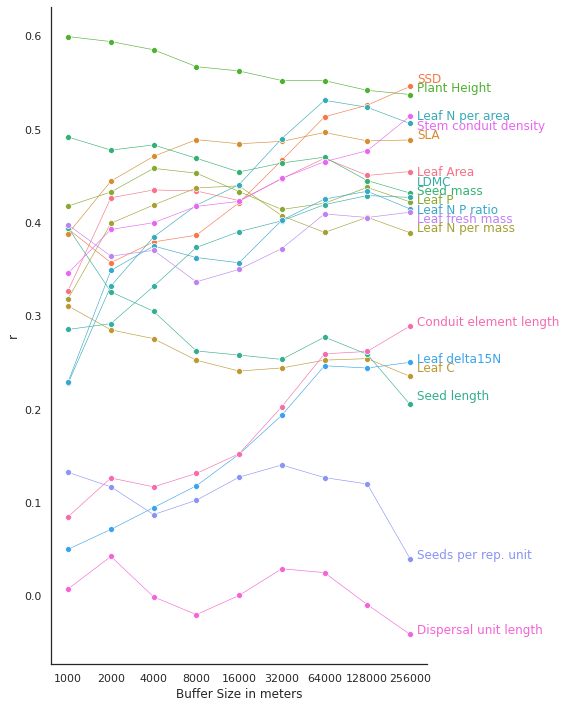

In [6]:
# https://stackoverflow.com/questions/44941082/plot-multiple-columns-of-pandas-dataframe-using-seaborn
# https://lost-stats.github.io/Presentation/Figures/line_graph_with_labels_at_the_beginning_or_end.html

# data 
data_dropnan = r_all.dropna(axis=1, how='all')
data_melt=pd.melt(data_dropnan, ['BufferSize'], value_name="r")
data_melt =data_melt.astype({"BufferSize": str}, errors='raise') 

# label names
trait_names = data_melt["variable"].unique()

sns.set(rc={'figure.figsize':(8,10)})
sns.set_theme(style="white")
fig, ax = plt.subplots()

# plot all lines into one plot

sns.lineplot(x='BufferSize', 
            y='r', 
            hue='variable', 
            data=data_melt,
            ax=ax,
            marker='o',
            legend=None,
            linewidth=0.6)

label_pos=[]

# Add the text--for each line, find the end, annotate it with a label
for line, variable in zip(ax.lines, trait_names):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    if not np.isfinite(y):
        y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue 
    x=round(x)
    y=round(y,2)
    xy=(x*1.02, y)
    if xy in label_pos:
        xy=(x*1.02, y-0.01)
    if xy in label_pos:
        xy=(x*1.02, y+0.01)
    label_pos.append(xy)
    text = ax.annotate(variable,
                       xy=(xy),
                       xytext=(0, 0),
                       color=line.get_color(),
                       xycoords=(ax.get_xaxis_transform(),
                                 ax.get_yaxis_transform()),
                       textcoords="offset points")
    text_width = (text.get_window_extent(
    fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
    #if np.isfinite(text_width):
     #   ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.05)
        
# Format the date axis to be prettier.
sns.despine()
plt.xlabel("Buffer Size in meters")
plt.ylabel("r") 
plt.tight_layout()

plt.savefig('../Figures/r_buffer.pdf', bbox_inches='tight')  

## Scatter correlation plots for 64,000 m buffer size

In [52]:
optimal_buffer_size = 64000
file_name = "Buffer_Rerun/all_buffer_means_" + str(optimal_buffer_size) + ".csv"
buffer_means = pd.read_csv(file_name, 
                          sep=",", 
                          usecols=['NumberiNatObservations','PlotObservationID', 'Leaf Area', 
                                   'SSD',
 'SLA',
 'Leaf C',
 'Leaf N per mass',
 'Leaf P',
 'Plant Height',
 'Seed mass',
 'Seed length',
 'LDMC',
 'Leaf N per area',
 'Leaf N P ratio',
 'Leaf delta15N',
 'Seeds per rep. unit',
 'Leaf fresh mass',
 'Stem conduit density',
 'Dispersal unit length',
 'Conduit element length'
                                  ],
                          index_col=False)
buffer_means = buffer_means[~buffer_means.isin([np.nan, np.inf, -np.inf]).any(1)]

In [53]:
#transform dataframe from wide to long

sPlot_t = sPlot.melt(id_vars=["PlotObservationID", "Latitude", "Longitude", "Biome", "Naturalness", "Forest", 
                              "Shrubland", "Grassland", "Wetland", "Sparse_vegetation"], 
                     value_name="TraitValue", 
                     var_name="Trait",
                     value_vars=trait)

buffer_means_t = buffer_means.melt(id_vars=["PlotObservationID", "NumberiNatObservations"], 
                                   value_name="TraitValue", 
                                   var_name="Trait",
                                   value_vars=trait)

sPlot_buffers_merged = pd.merge(sPlot_t, buffer_means_t, on=["PlotObservationID", "Trait"])

In [42]:
trait=['Leaf Area', 
 'SSD',
 'SLA',
 'Leaf C',
 'Leaf N per mass',
 'Leaf P',
 'Plant Height',
 'Seed mass',
 'Seed length',
 'LDMC',
 'Leaf N per area',
 'Leaf N P ratio',
 'Leaf delta15N',
 'Seeds per rep. unit',
 'Leaf fresh mass',
 'Stem conduit density',
 'Dispersal unit length',
 'Conduit element length']


In [43]:
# calculate max-min ranges

def min__max_ranges(df, col_1, col_2, variable_col, variables):

    range_all =[]

    for i in variables:
        df_sub = df[df[variable_col]==i]
        df_sub = df_sub.dropna(subset = [col_1, col_2])
    
        xmin = df_sub[col_1].quantile(0.01)
        xmax = df_sub[col_1].quantile(0.99)
    
        ymin = df_sub[col_2].quantile(0.01)
        ymax = df_sub[col_2].quantile(0.99)
    
    
        if xmin>ymin:
            if not np.isfinite(ymin):
                pass
            else:
                xmin = ymin
        else:
            pass
    
        if xmax<ymax:
            xmax=ymax
        else:
            pass
        
        range_sub = [xmin, xmax]
    
        range_all.append(range_sub)
        
    ranges  = pd.DataFrame()
    ranges['variable'] = variables
    ranges['min'] = [i[0] for i in range_all]
    ranges['max'] = [i[1] for i in range_all]
    ranges = ranges.set_index('variable')

    return ranges

In [44]:
ranges = min__max_ranges(sPlot_buffers_merged, 'TraitValue_x', 'TraitValue_y', 
                         variable_col='Trait', variables=trait)

In [45]:
ranges

,min,max
variable,,
Leaf Area,2.491325,9.293933
SSD,-1.780534,-0.281056
SLA,1.391215,3.694397
Leaf C,5.987216,6.251625
Leaf N per mass,2.325956,3.522470
Leaf P,-0.430572,1.155212
Plant Height,-2.443895,3.027281
Seed mass,-2.659446,5.554995
Seed length,-0.120123,2.489541


This might take a few minutes to plot:

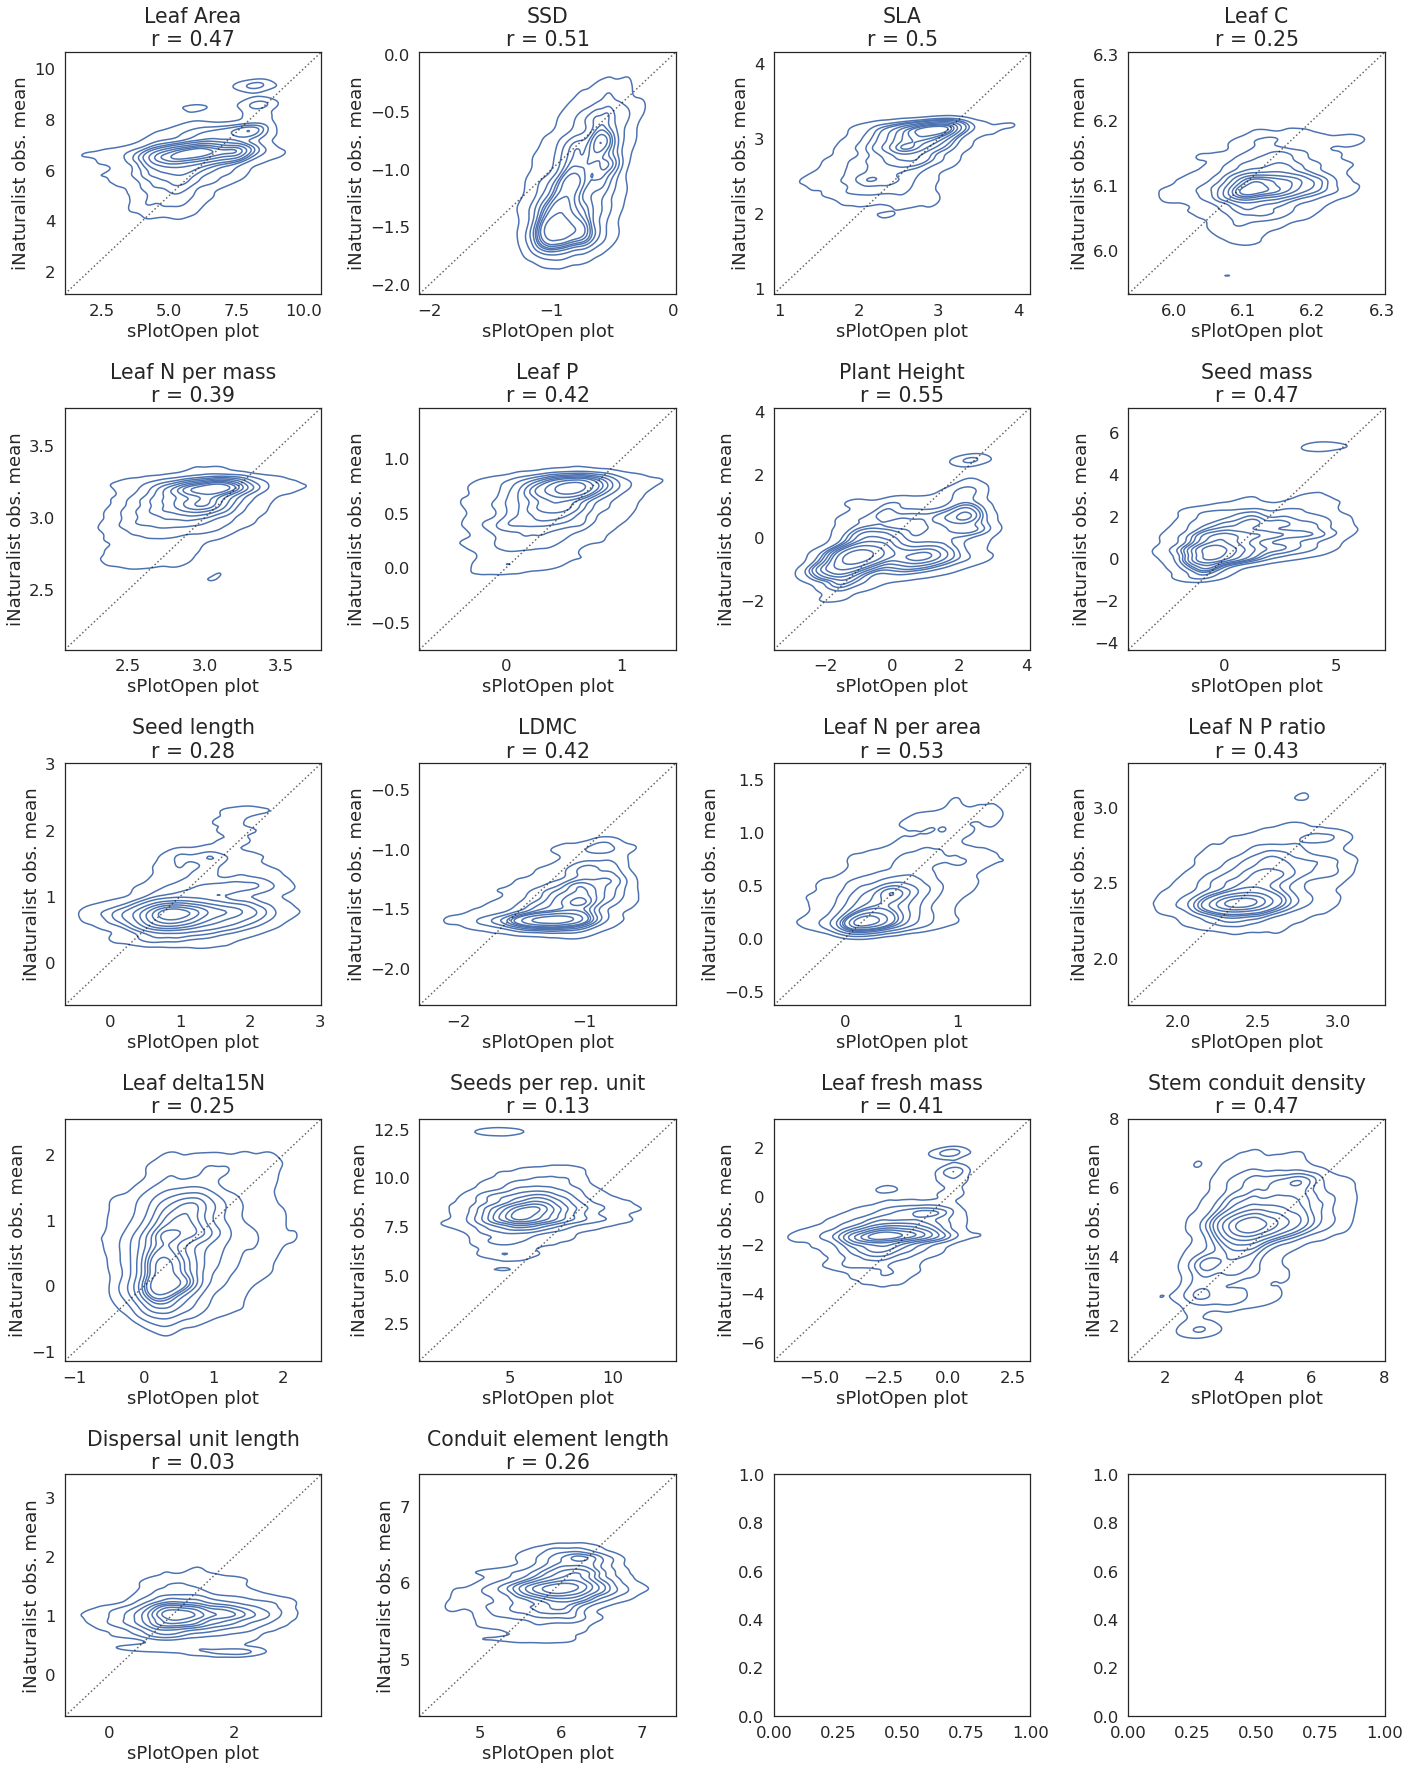

In [61]:
fig, axes = plt.subplots(ncols=4, nrows=5, figsize=(20,25))

sns.set_theme(style="white", font_scale=1.7)

for i, ax in zip(trait, axes.flat):

    sub_df = sPlot_buffers_merged[sPlot_buffers_merged["Trait"]==i]

    index=0
    trait_title= str(i) + "\n" + "r = " + str(round(r_all.loc[6, i], 2))

    sns.kdeplot(
        data=sub_df,
        x="TraitValue_x", 
        y="TraitValue_y",
        ax=ax,
        ).set(title=trait_title, xlabel='sPlotOpen plot', ylabel='iNaturalist obs. mean')

    ax.axline([0, 0], [1, 1], color= "black", alpha=0.6, ls = ":")
    
    space = (ranges.loc[i, "max"]-[ranges.loc[i, "min"]]) * 0.2
    ax.set_xlim(ranges.loc[i, "min"] - abs(space), ranges.loc[i, "max"] + abs(space))
    ax.set_ylim(ranges.loc[i, "min"] - abs(space), ranges.loc[i, "max"] + abs(space))
    
    index+=1

fig.tight_layout()

plt.savefig('../Figures/corr_buffer_all_64k_kde.pdf', bbox_inches='tight')  